Assignment 1  
DS5230 - Spring 2024  
Michael Massone  
1/16/2024  

### Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

### Params:

In [51]:
file_name = 'assign_1_modified_iris_ds5230.csv'
headers = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']
target_class = 'class'

### Path

In [52]:

file_path = os.path.join(os.getcwd(), file_name)
print(f'file path: {file_path}')

file path: /Users/mikey/LocalFiles/DS5230/assignments/assign_1/assign1_mmassone/assign_1_modified_iris_ds5230.csv


### Functions:

In [53]:

def num_encode(target_df, target_class):
    '''This function numericlally encodes the target vector using integer mapping.
    Input: df
    Output: df
    '''

    #extract unique classes as array
    classes = target_df[target_class].unique()

    #create array of integers of length equal to classes, starting with 1
    nums = np.arange(1, classes.shape[0]+1)

    #create dictionary for mapping class str values to integers
    target_mapping = dict(zip(classes, nums))
    print(f'Target Encoding: \n{target_mapping}')
    
    #update dataframe with mapped target column
    target_df[target_class] = target_df[target_class].map(target_mapping)

    return target_df

#### Load Data and Add Column Headers

In [54]:
#load dataframe from csv and add header
df = pd.read_csv(file_path, header=None, names=headers) 
print(df.shape)
df.head()

(150, 5)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,6.1,2.8,4.7,1.2,Iris-versicolor
1,5.7,3.8,1.7,0.3,Iris-setosa
2,7.7,2.6,6.9,2.3,Iris-virginica
3,6.0,2.9,4.5,1.5,Iris-versicolor
4,6.8,2.8,4.8,1.4,Iris-versicolor


#### Drop data objects that have a missing value in the target attribute:

In [55]:
print(df.shape)
rows_before = df.shape[0]

# rows with Nan values in target vector
df.dropna(subset=target_class, inplace=True)
print(df.shape)

#print number of dropped rows
rows_dropped = rows_before - df.shape[0]
print(f'Number of rows dropped: {rows_dropped}')

(150, 5)
(138, 5)
Number of rows dropped: 12


#### Add ID attribute

In [56]:
df['id'] = range(0, df.shape[0])
print(df.id)
df.head()

0        0
1        1
2        2
3        3
4        4
      ... 
145    133
146    134
147    135
148    136
149    137
Name: id, Length: 138, dtype: int64


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,id
0,6.1,2.8,4.7,1.2,Iris-versicolor,0
1,5.7,3.8,1.7,0.3,Iris-setosa,1
2,7.7,2.6,6.9,2.3,Iris-virginica,2
3,6.0,2.9,4.5,1.5,Iris-versicolor,3
4,6.8,2.8,4.8,1.4,Iris-versicolor,4


#### Arrange columns:

In [57]:
df = df[['id', 'sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']]
df.head()

,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,0,6.1,2.8,4.7,1.2,Iris-versicolor
1,1,5.7,3.8,1.7,0.3,Iris-setosa
2,2,7.7,2.6,6.9,2.3,Iris-virginica
3,3,6.0,2.9,4.5,1.5,Iris-versicolor
4,4,6.8,2.8,4.8,1.4,Iris-versicolor


## Create target DataFrame:

In [58]:
target_df = df[['id', 'class']].copy()
target_df

,id,class
0,0,Iris-versicolor
1,1,Iris-setosa
2,2,Iris-virginica
3,3,Iris-versicolor
4,4,Iris-versicolor
...,...,...
145,133,Iris-versicolor
146,134,Iris-virginica
147,135,Iris-setosa
148,136,Iris-versicolor


#### Number of classes in target vector:

In [59]:
num_classes = target_df[target_class].nunique()
print(f'Number of classes in target vector: {num_classes}')

Number of classes in target vector: 3


#### Target Numerical Encoding

In [60]:
target_df = num_encode(target_df, target_class)

Target Encoding: 
{'Iris-versicolor': 1, 'Iris-setosa': 2, 'Iris-virginica': 3}


#### Encoding:
* Iris-versicolor: 1
* Iris-setosa: 2
* Iris-virginica: 3

### Save Target Dataframe to csv

In [61]:
target_df.to_csv(file_path.split('.')[0] + '_target.csv', index=False)
print(f"Target dataframe saved at: {file_path.split('.')[0]}_target.csv")

Target dataframe saved at: /Users/mikey/LocalFiles/DS5230/assignments/assign_1/assign1_mmassone/assign_1_modified_iris_ds5230_target.csv


## Create attribute dataframe:

In [62]:
attr_df = df.drop(columns=['class'])
print(attr_df)

      id  sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0      0              6.1             2.8              4.7             1.2
1      1              5.7             3.8              1.7             0.3
2      2              7.7             2.6              6.9             2.3
3      3              6.0             2.9              4.5             1.5
4      4              6.8             2.8              4.8             1.4
..   ...              ...             ...              ...             ...
145  133              6.1             2.8              4.0             1.3
146  134              4.9             2.5              4.5             1.7
147  135              5.8             4.0              1.2             0.2
148  136              5.8             2.6              4.0             1.2
149  137              7.1             3.0              5.9             2.1

[138 rows x 5 columns]


#### Design Matrix Set Size

In [63]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               138 non-null    int64  
 1   sepal_length_cm  131 non-null    float64
 2   sepal_width_cm   136 non-null    float64
 3   petal_length_cm  132 non-null    float64
 4   petal_width_cm   129 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.5 KB


In [64]:
attr_df.shape

(138, 5)

Design Matrix Dimensions:
* Instances (Rows) = 138
* Attributes (Columns) = 5 

#### Attribute Types

In [65]:
attr_df.dtypes

id                   int64
sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
dtype: object

#### Missingness Numerically

In [66]:
attr_df.isna().sum()

id                 0
sepal_length_cm    7
sepal_width_cm     2
petal_length_cm    6
petal_width_cm     9
dtype: int64

In [67]:
attr_df.isna().sum()/df.shape[0] #code from S.Morin: prep_labeled_data_set_for_usml.ipynb

id                 0.000000
sepal_length_cm    0.050725
sepal_width_cm     0.014493
petal_length_cm    0.043478
petal_width_cm     0.065217
dtype: float64

#### Missingness via Missingno

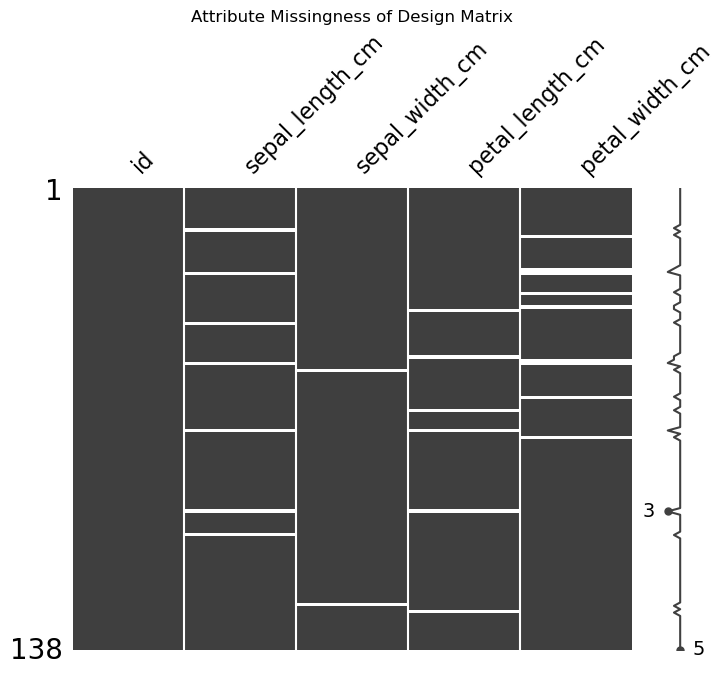

In [68]:
msno.matrix(attr_df, figsize=(8, 6))
plt.title('Attribute Missingness of Design Matrix')
plt.savefig('attr_missingno.png', bbox_inches="tight")
plt.show();


### Save Attribute Dataframe

In [69]:
attr_df.to_csv(file_path.split('.')[0] + '_design.csv', index=False)
print(f"Design matrix saved at: {file_path.split('.')[0]}_design.csv")

Design matrix saved at: /Users/mikey/LocalFiles/DS5230/assignments/assign_1/assign1_mmassone/assign_1_modified_iris_ds5230_design.csv


### Attribute Pairplots

/Users/mikey/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mikey/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mikey/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mikey/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

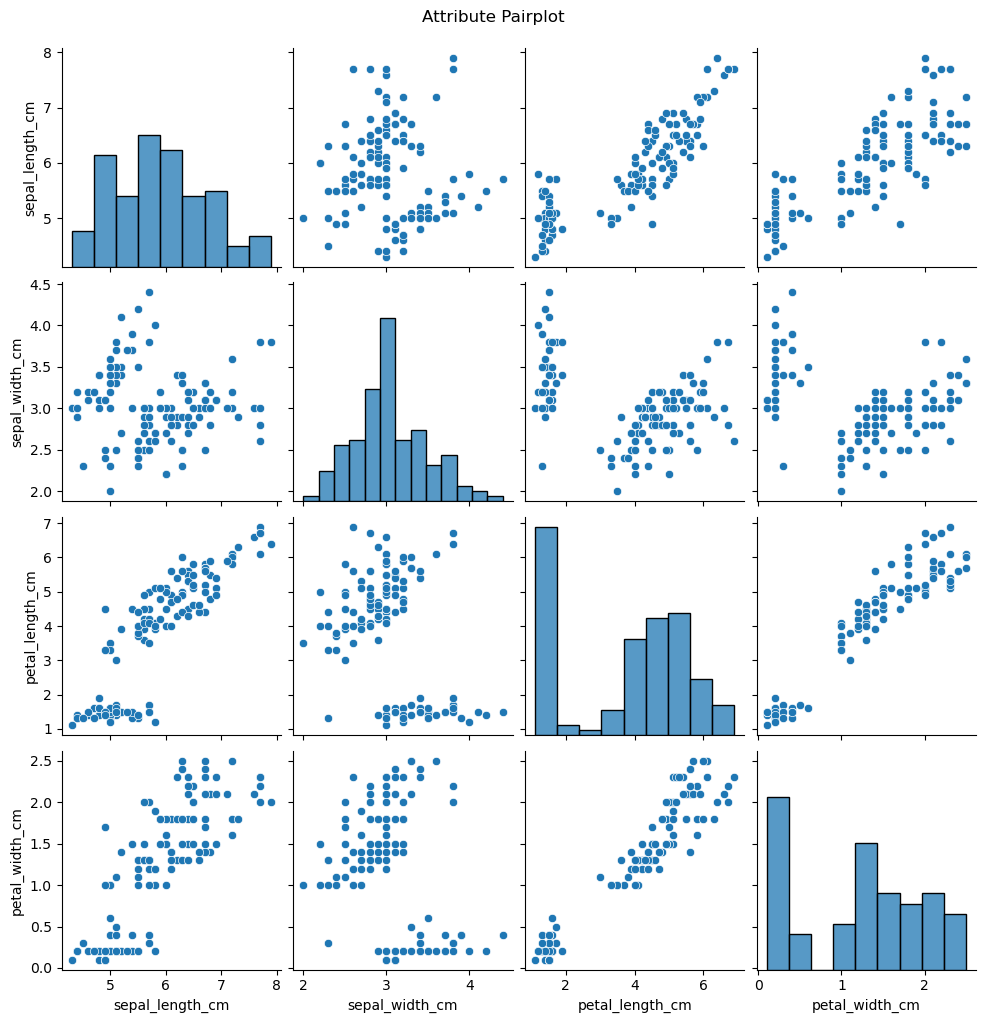

In [70]:
data = attr_df.drop('id', axis=1, inplace=False)
sns.pairplot(data=data)
plt.suptitle('Attribute Pairplot', y=1.02)
plt.savefig('attr_pairplot.png', bbox_inches="tight")
plt.show();


### Attribute Histogram

/Users/mikey/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mikey/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mikey/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mikey/miniconda3/envs/usml_base_ds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

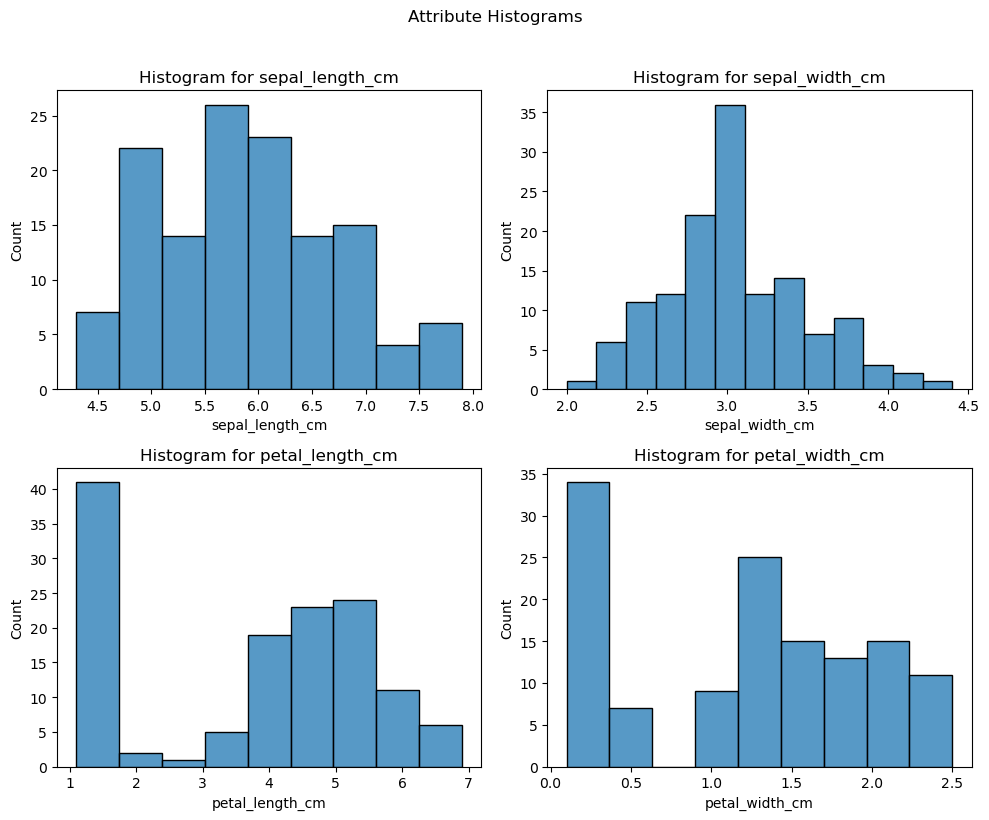

In [71]:
data = attr_df.drop('id', axis=1, inplace=False)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')

plt.suptitle('Attribute Histograms', y=1.02)
plt.tight_layout()
plt.savefig('attr_hists.png', bbox_inches="tight")
plt.show()